In this notebook, we will practice some calculations of portfolio returns. This will give us some practice using Numpy arrays and plotting with Matplotlib.

In [1]:
# always import all necessary libraries at the top of the file
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Data

We'll begin by loading data from the file `dataPort.csv`. This contains a matrix of prices, each row corresponding to a day. The columns, in order from left to right, correspond to the S&P 500 index, crude oil index, and the U.S. 10-year Treasury index.

In [2]:
data_port = pd.read_csv('./dataPort.csv', parse_dates=['date'])

In [3]:
data_port.dtypes

date             datetime64[ns]
sp500                   float64
crude_oil               float64
treasury_10yr           float64
dtype: object

In [4]:
data_port.head()

,date,sp500,crude_oil,treasury_10yr
0,2013-08-29,1638.17,87.26,2.7617
1,2013-08-30,1632.97,87.50,2.7839
2,2013-09-03,1639.77,87.76,2.8576
3,2013-09-04,1653.08,87.78,2.8966
4,2013-09-05,1655.08,87.94,2.9937


In [5]:
data_port.tail()

,date,sp500,crude_oil,treasury_10yr
495,2015-09-03,1951.13,46.75,2.1596
496,2015-09-04,1921.22,46.05,2.1244
497,2015-09-08,1969.41,45.94,2.1828
498,2015-09-09,1942.04,44.15,2.2006
499,2015-09-10,1952.29,45.92,2.2220


In [6]:
# Don't worry about the Pandas details here
prices = data_port.iloc[:,1:].values

In [7]:
prices

array([[1638.17  ,   87.26  ,    2.7617],
       [1632.97  ,   87.5   ,    2.7839],
       [1639.77  ,   87.76  ,    2.8576],
       ...,
       [1969.41  ,   45.94  ,    2.1828],
       [1942.04  ,   44.15  ,    2.2006],
       [1952.29  ,   45.92  ,    2.222 ]])

In [8]:
type(prices)

numpy.ndarray

In [9]:
dates = data_port.iloc[:,0].values
dates[0:10]

array(['2013-08-29T00:00:00.000000000', '2013-08-30T00:00:00.000000000',
       '2013-09-03T00:00:00.000000000', '2013-09-04T00:00:00.000000000',
       '2013-09-05T00:00:00.000000000', '2013-09-06T00:00:00.000000000',
       '2013-09-09T00:00:00.000000000', '2013-09-10T00:00:00.000000000',
       '2013-09-11T00:00:00.000000000', '2013-09-12T00:00:00.000000000'],
      dtype='datetime64[ns]')

# Data Manipulation

 Create 3 column vectors---each containing the price history of one of the asset classes. Name the vectors `sp500`, `oil`, `bonds`.

In [10]:
sp500 = prices[:,0]
oil = prices[:,1]
bonds = prices[:,2]

 Create a row vector, `pNow`, with the latest price of each security.

In [11]:
pNow = prices[-1,:]
pNow

array([1952.29 ,   45.92 ,    2.222])

 Calculate the number of days `Nt` and the number of assets `Nk`.

In [12]:
prices.shape

(500, 3)

In [13]:
Nt, Nk = prices.shape
print(Nt, Nk)

500 3


 Calculate the matrix of history of returns for the three assets. Calculate both the log-return (`rets_log`) and the level-return (`rets`). The log and level returns are defined as:
 
 - log-return, $\tilde r_t = \log \left( \frac{P_{t+1}}{P_t} \right)$
 - level-return, $r_t = \frac{P_{t+1}}{P_t} - 1$

In [14]:
rets_log = np.log(prices[1:,:] / prices[:-1,:]) 
rets_log

array([[-0.00317932,  0.00274663,  0.00800639],
       [ 0.00415555,  0.00296702,  0.02612929],
       [ 0.00808423,  0.00022787,  0.01355552],
       ...,
       [ 0.0247736 , -0.00239157,  0.02711905],
       [-0.01399504, -0.03974327,  0.00812159],
       [ 0.00526408,  0.03930782,  0.00967764]])

In [15]:
rets_log.shape

(499, 3)

In [16]:
rets = prices[1:,:] / prices[:-1,:] - 1
rets

array([[-0.00317427,  0.0027504 ,  0.00803853],
       [ 0.00416419,  0.00297143,  0.02647365],
       [ 0.00811699,  0.00022789,  0.01364782],
       ...,
       [ 0.02508302, -0.00238871,  0.02749011],
       [-0.01389756, -0.03896387,  0.00815466],
       [ 0.00527796,  0.0400906 ,  0.00972462]])

Calculate a matrix of cumulative returns of the assets, named `rets_cum_log` and `rets_cum`. Recall that the cumulative return is simply

 - log-return, $\tilde r_{t,t_h} = \log \left( \frac{P_{t+h}}{P_t} \right)$
 - level-return, $r_{t,t+h} = \frac{P_{t+h}}{P_t} - 1$.
 
Note that you may find the Numpy function `numpy.matlib.repmat` helpful here. It allows you to build an array where every row corresponds to $P_t$. You can then use this array in the denominator of array arithmetic and skip any need for coding loops. You could also do this with matrix multiplication involving a vector of 1's.

In [17]:
import numpy.matlib

In [18]:
pvec = numpy.matlib.repmat(prices[0,:], Nt, 1)
pvec

array([[1638.17  ,   87.26  ,    2.7617],
       [1638.17  ,   87.26  ,    2.7617],
       [1638.17  ,   87.26  ,    2.7617],
       ...,
       [1638.17  ,   87.26  ,    2.7617],
       [1638.17  ,   87.26  ,    2.7617],
       [1638.17  ,   87.26  ,    2.7617]])

In [19]:
rets_cum_log = np.log(prices / pvec)
rets_cum_log

array([[ 0.        ,  0.        ,  0.        ],
       [-0.00317932,  0.00274663,  0.00800639],
       [ 0.00097622,  0.00571365,  0.03413568],
       ...,
       [ 0.18415424, -0.64155597, -0.23523798],
       [ 0.1701592 , -0.68129924, -0.22711638],
       [ 0.17542328, -0.64199142, -0.21743874]])

In [20]:
rets_cum = prices / pvec - 1 # example of broadcasting
rets_cum

array([[ 0.        ,  0.        ,  0.        ],
       [-0.00317427,  0.0027504 ,  0.00803853],
       [ 0.0009767 ,  0.00573   ,  0.03472499],
       ...,
       [ 0.20220124, -0.47352739, -0.20961726],
       [ 0.18549357, -0.4940408 , -0.20317196],
       [ 0.19175055, -0.47375659, -0.19542311]])

# Calculations

Simply for practice, let's make the following calculations. For how many days does the S&P500 log-return and level-return differ by more than 5 basis points? That is,
$$
| \tilde r_t - r_t | > .0005
$$

In [21]:
np.abs(rets_log[:,0] - rets[:,0]) > .0005

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [22]:
np.sum(np.abs(rets_log[:,0] - rets[:,0]) > .0005)

3

For which asset is there the biggest difference in the total cumulative level-return versus the total cumulative log-return? That is, compute the absolute value of the difference between the log-return and the level-return at each time period. Sum these difference over each time period. Do this for each asset and see for which asset these differences are the largest.

In [23]:
np.sum(np.abs(rets_log - rets), axis=0)

array([0.01620319, 0.07979205, 0.10919543])

In [24]:
# Normalized, per period average differences.
np.sum(np.abs(rets_log - rets), axis=0)/(Nt-1)

array([3.24713300e-05, 1.59903901e-04, 2.18828507e-04])

In [25]:
np.set_printoptions(suppress=True)

In [26]:
# Normalized, per period average differences.
np.sum(np.abs(rets_log - rets), axis=0)/(Nt-1)

array([0.00003247, 0.0001599 , 0.00021883])

In [27]:
np.sum(np.abs(rets_log - rets) > .0005, axis=0)

array([ 3, 49, 64])

Suppose an investor puts weights of 50%, 30%, and 20% in the S&P500, oil, and bonds. Calculate the history of portfolio returns, (level-returns). Call this vector `rets_port`.

In [28]:
rets_port = .5 * rets[:,0] + .3 * rets[:,1] + .2 * rets[:,2]

What percentage of days does the portfolio have a positive return?

In [29]:
np.mean(rets_port > 0)

0.5470941883767535

Calculate the history of cumulative (level-)returns of the portfolio. Call this `rets_cum_port`. Calculate the cumulative portfolio return by starting with the portfolio return series and using `numpy.cumprod`.

In [30]:
rets_cum_port = np.cumprod(rets_port + 1) - 1

Calculate the cumulative log-returns of the three separate assets using `numpy.cumsum`.

In [31]:
rets

array([[-0.00317427,  0.0027504 ,  0.00803853],
       [ 0.00416419,  0.00297143,  0.02647365],
       [ 0.00811699,  0.00022789,  0.01364782],
       ...,
       [ 0.02508302, -0.00238871,  0.02749011],
       [-0.01389756, -0.03896387,  0.00815466],
       [ 0.00527796,  0.0400906 ,  0.00972462]])

In [32]:
rets_cum = np.cumsum(rets_log, axis=0)

# Plots

Create a plot of the price history of the S&P 500.

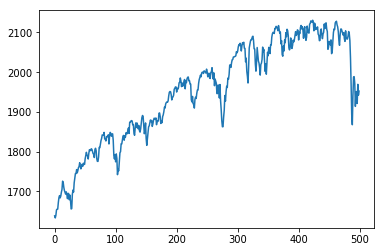

In [33]:
plt.plot(sp500)

In a separate figure, create 4 sub-plots of cumulative returns. That is, plot the history of cumulative returns for each of the 3 assets as well as the portfolio. Use pyplot's `subplot` function.

You can check here to see Crude Oil prices to verify that this looks correct: http://www.macrotrends.net/1369/crude-oil-price-history-chart

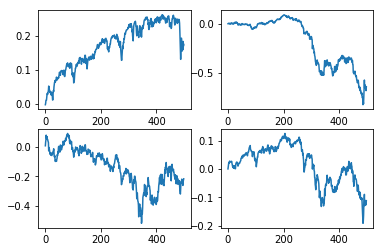

In [34]:
plt.subplot(2,2,1)
plt.plot(rets_cum[:,0])

plt.subplot(2,2,2)
plt.plot(rets_cum[:,1])

plt.subplot(2,2,3)
plt.plot(rets_cum[:,2])

plt.subplot(2,2,4)
plt.plot(rets_cum_port);

Make the same plot as above again. However, this time, make sure that the y-axis is the same on each plot. You can do this the manually using pyplot's `ylim` (note the corresponding `xlim` function) or you can do this the better way using pyplot's shared axis feature seen here: https://matplotlib.org/gallery/subplots_axes_and_figures/shared_axis_demo.html#sphx-glr-gallery-subplots-axes-and-figures-shared-axis-demo-py

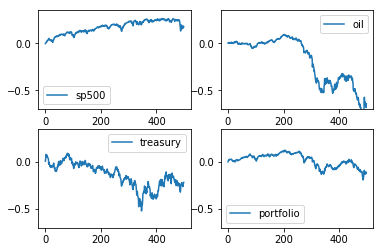

In [35]:
# Manually
plt.subplot(221)
plt.plot(rets_cum[:,0], label='sp500')
plt.ylim((-.7,.35))
plt.legend()

plt.subplot(222)
plt.plot(rets_cum[:,1], label='oil')
plt.ylim((-.7,.35))
plt.legend()

plt.subplot(223)
plt.plot(rets_cum[:,2], label='treasury')
plt.ylim((-.7,.35))
plt.legend()

plt.subplot(224)
plt.plot(rets_cum_port, label='portfolio')
plt.ylim((-.7,.35))
plt.legend()

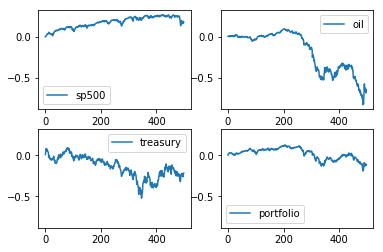

In [36]:
# Using the shared axis feature
ax1 = plt.subplot(221)
plt.plot(rets_cum[:,0], label='sp500')
plt.legend()

plt.subplot(222, sharey=ax1)
plt.plot(rets_cum[:,1], label='oil')
plt.legend()

plt.subplot(223, sharey=ax1)
plt.plot(rets_cum[:,2], label='treasury')
plt.legend()

plt.subplot(224, sharey=ax1)
plt.plot(rets_cum_port, label='portfolio')
plt.legend()

Finally, create another figure where you plot both the S&P500 cumulative return history as well as the portfolio cumulative return history in the same figure. Give each plot a label and include a legend. To do this, look up the pyplot `legend` function: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

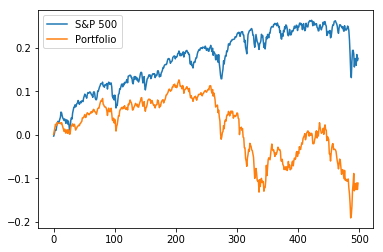

In [37]:
plt.plot(rets_cum[:,0], label='S&P 500')
plt.plot(rets_cum_port, label='Portfolio')
plt.legend()

# Extra

- Try plotting the dates against the cumulative returns. Use `plt.plot(x,y)` where `x` is the dates and `y` is the returns data (a `499 x 3` array). For the dates data, use `data_port['dates']` or `data_port.dates`. 

- Note that it will be helpful to rotate the ticks on the x-axis. You can do this using the function shown here: https://stackoverflow.com/a/37708190/1411791

- Add a legend. Specify the legend with `plt.legend(['label1', 'label2', 'label3'])`

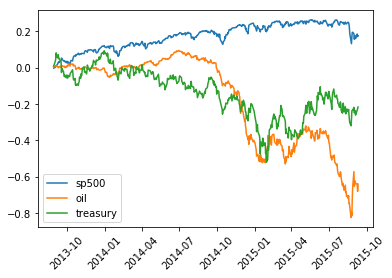

In [38]:
plt.plot(dates[1:], rets_cum)
plt.xticks(rotation=45);
plt.legend(['sp500', 'oil', 'treasury'])

Try using xlabel, ylabel, title. Search the matplotlib.pyplot help documentation for more.

Text(0.5,1,'Cumulative Asset Returns')

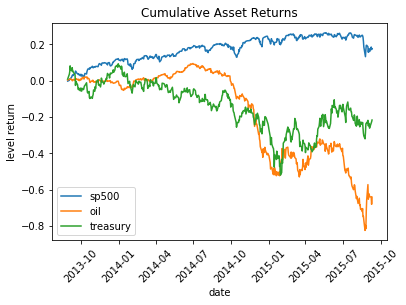

In [39]:
plt.plot(dates[1:], rets_cum)
plt.xticks(rotation=45);
plt.legend(['sp500', 'oil', 'treasury'])
plt.xlabel('date')
plt.ylabel('level return')
plt.title('Cumulative Asset Returns')

Try calculating the basic statistics of the level returns. Get the mean, standard-deviation,
skewness, and correlations. Mean, standard deviation, and correlation can be calculated in numpy. The skewness can be calculated using `scipy.stats.skew`. When using the `corrcoef` function, be sure to set `rowvar=False`.

In [40]:
np.mean(rets, axis=0)

array([ 0.00038402, -0.00112665, -0.00021692])

In [41]:
np.std(rets, axis=0)

array([0.00804522, 0.01783657, 0.02094268])

In [42]:
np.corrcoef(rets, rowvar=False)

array([[1.        , 0.24935321, 0.34262396],
       [0.24935321, 1.        , 0.21279266],
       [0.34262396, 0.21279266, 1.        ]])

In [43]:
from scipy.stats import skew 

In [44]:
skew(rets, axis=0)

array([-0.30829305,  0.21111412,  0.25401663])

The return matrices have one less row than the price matrix. Remedy this by adding a first row of NaN values to the return matrices. Use numpy's `vstack` function.

In [45]:
np.vstack([[np.nan, np.nan, np.nan], rets])

array([[        nan,         nan,         nan],
       [-0.00317427,  0.0027504 ,  0.00803853],
       [ 0.00416419,  0.00297143,  0.02647365],
       ...,
       [ 0.02508302, -0.00238871,  0.02749011],
       [-0.01389756, -0.03896387,  0.00815466],
       [ 0.00527796,  0.0400906 ,  0.00972462]])

Import the `seaborn` package and run `seaborn.set()` to change the default matplotlib style. Regenerate some of the plots above to see how the style changes.

In [46]:
import seaborn as sns
sns.set()

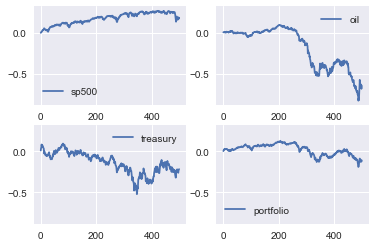

In [47]:
# Using the shared axis feature
ax1 = plt.subplot(221)
plt.plot(rets_cum[:,0], label='sp500')
plt.legend()

plt.subplot(222, sharey=ax1)
plt.plot(rets_cum[:,1], label='oil')
plt.legend()

plt.subplot(223, sharey=ax1)
plt.plot(rets_cum[:,2], label='treasury')
plt.legend()

plt.subplot(224, sharey=ax1)
plt.plot(rets_cum_port, label='portfolio')
plt.legend()

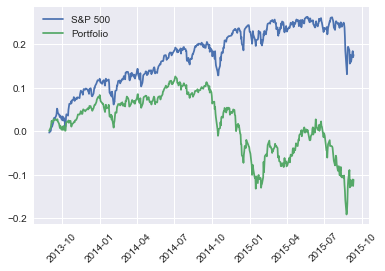

In [48]:
plt.plot(dates[1:], rets_cum[:,0], label='S&P 500')
plt.plot(dates[1:], rets_cum_port, label='Portfolio')
plt.legend()
plt.xticks(rotation=45);